**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *A comparison between Logistic Regression and MPL Neural Network in Music Genre Classification* 

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*

This is the final report of a machine learning project with the purpose of classifying music to one of the ten genres: pop-rock, electronic, rap, jazz, latin, RnB, international, country, reggae and blues; using 3 components of music: timbre, pitch (melody and harmony) and rhythm. From this project, our group aims to complete a whole machine learning project to understand the whole process of completing a data analysis project and apply our machine learning skills from our university course.

Questions the project aims to answer:
What features are most relevant in prediction music class?
How to create a music good-performing classifying model to predict music genre?

These questions would help our group solve this multi-class classification problem. This classification can be applied in music applications to recognize the genre and quickly place new music tracks into different groups/genres. 




## 2. Data analysis

Our data analysis follows the following process:

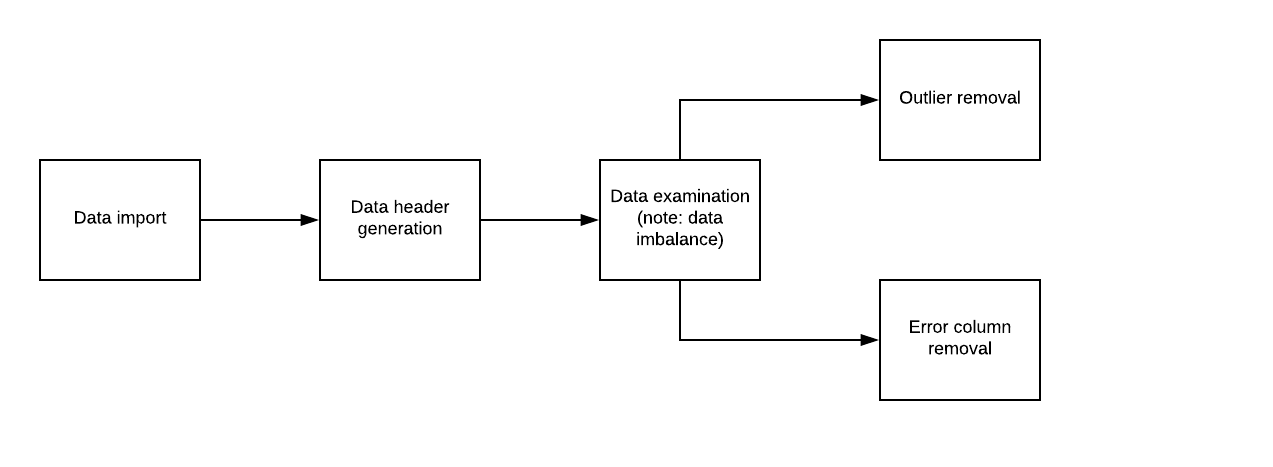

In [1]:
from IPython.display import Image
Image(filename='block digram for  data analytics.png') 

First we start with importing data in and assign corresponding headers and data types. 

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the data and cleanup
x_header = pd.read_csv("x_header.csv")
train_data = pd.read_csv('train_data.csv', header = None)
test_data = pd.read_csv('test_data.csv', header = None)
train_labels = pd.read_csv('train_labels.csv', header = None, dtype = 'category' )

header = pd.DataFrame(data = x_header)
X = pd.DataFrame(data = train_data)
X.columns = header.ID
X_test = pd.DataFrame(data = test_data)
X_test.columns = header.ID
y = pd.DataFrame(data = train_labels)
y.columns = ['Genre']


Let's start with examining the labels. 
We have 10 labels denoting by numbers from 1-10, each corresponding to one music genre. A histogram is created to show the distribution of these 10 classes (Figure 1). We can see clearly in here there is a significant imbalance between those classes. Pop/Rock already accounts for 50% of the labels. Also, there are minority classes like Blues, Reggae in which only account for 2% of the training data. This lack of information will make it difficult for training the models to classify minority classes. 

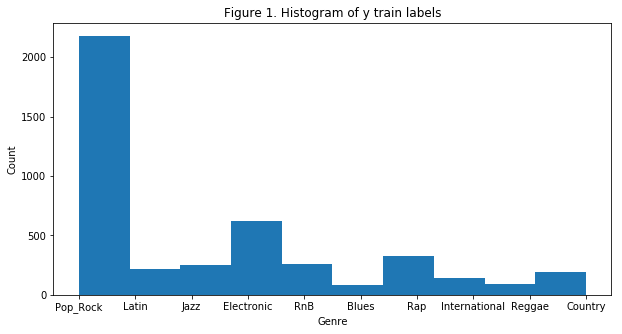

(array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([2178,   86,  618,  326,  253,  214,  260,  141,  195,   92]))


In [3]:
#Examine y
plt.figure(figsize=(10,5))
plt.hist(y.values)
plt.xlabel("Genre")
plt.ylabel("Count")
x_values = ['1','2','3','4','5','6','7','8','9','10']
x_texts = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
plt.xticks(x_values, x_texts)
plt.title("Figure 1. Histogram of y train labels")
plt.show()

print(np.unique(y,return_counts = True))

Next we move on to examine the feature data:

In [4]:
#Analysis of the feature data
X.drop_duplicates() #drop duplicates if there are
print(X.info())
print(X_test.info())
display(HTML(X.head(10).to_html(max_rows=10)))
display(HTML(X_test.head(10).to_html(max_rows=10)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 8.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 13.2 MB
None


ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,1040.70,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.70,1953.4,1513.50,1882.60,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.390,1.49

ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,3115.50,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,2428.2,2378.60,2970.8,3103.1,3817.4,4147.1,3920.10,3407.60,2426.80,1857.40,1478.60,1276.10,555.870,

We have 4363 songs' data for training and 6544 for testing the models. Each songs' data has 264 features representing 3 main components of music: timbre, pitch and rhythm. There is no duplicates. Looking further into each column's data:

In [5]:
#Summary data frequencies
for i in X.columns:
    print("X", X[i].value_counts().head(3))
    print("X_test", X_test[i].value_counts().head(3))
#print(y.loc[X['MFCC_Min_1']==0].groupby('Genre').size())
#print(y.loc[X['MFCC_Min_1']>0].groupby('Genre').size())


X 3529.9    3
3353.5    3
1455.4    3
Name: Rhythm_Mean_1, dtype: int64
X_test 1.066       4
2082.900    3
2962.600    3
Name: Rhythm_Mean_1, dtype: int64
X 3307.8    3
3458.6    3
4542.5    3
Name: Rhythm_Mean_2, dtype: int64
X_test 1.066       4
5274.700    4
4951.900    3
Name: Rhythm_Mean_2, dtype: int64
X 3327.5    3
5376.9    3
3986.6    3
Name: Rhythm_Mean_3, dtype: int64
X_test 1.066       4
3476.200    4
3740.100    3
Name: Rhythm_Mean_3, dtype: int64
X 3581.4    3
6023.9    3
4236.6    3
Name: Rhythm_Mean_4, dtype: int64
X_test 3498.900    4
1.066       4
4168.000    4
Name: Rhythm_Mean_4, dtype: int64
X 3530.8    3
2844.0    3
3479.5    3
Name: Rhythm_Mean_5, dtype: int64
X_test 1.066       4
2929.900    4
3351.600    3
Name: Rhythm_Mean_5, dtype: int64
X 3318.8    3
3073.8    3
3305.5    3
Name: Rhythm_Mean_6, dtype: int64
X_test 1.066       4
3051.200    4
3046.900    4
Name: Rhythm_Mean_6, dtype: int64
X 3315.1    3
3321.7    3
3013.2    3
Name: Rhythm_Mean_7, dtype: int6

X 1097.7    4
1097.0    3
1240.4    3
Name: Rhythm_Var_10, dtype: int64
X_test 1415.1    5
1517.6    4
1000.0    4
Name: Rhythm_Var_10, dtype: int64
X 1087.1    4
1478.2    4
1207.2    3
Name: Rhythm_Var_11, dtype: int64
X_test 1161.4    6
1472.8    4
1000.0    4
Name: Rhythm_Var_11, dtype: int64
X 1469.2    4
1202.7    4
1247.1    4
Name: Rhythm_Var_12, dtype: int64
X_test 1000.0    4
1087.5    4
1074.1    4
Name: Rhythm_Var_12, dtype: int64
X 1172.7    5
1265.1    3
1057.3    3
Name: Rhythm_Var_13, dtype: int64
X_test 1217.1    4
1331.1    4
1073.0    4
Name: Rhythm_Var_13, dtype: int64
X 1216.4    4
1236.5    3
1400.9    3
Name: Rhythm_Var_14, dtype: int64
X_test  1016.0    5
-1000.0    4
 1476.3    4
Name: Rhythm_Var_14, dtype: int64
X 1074.5    4
1063.5    3
1180.8    3
Name: Rhythm_Var_15, dtype: int64
X_test -1000.0    5
 1281.2    5
 1293.3    4
Name: Rhythm_Var_15, dtype: int64
X 1529.0    4
1177.6    3
1123.2    3
Name: Rhythm_Var_16, dtype: int64
X_test -1000.0    5
 1026.2 

X_test 4.768       15
2007.700     4
3111.500     4
Name: Rhythm_Skewness_18, dtype: int64
X 1.066       8
2814.200    4
2301.900    3
Name: Rhythm_Skewness_19, dtype: int64
X_test 1.066       18
2581.300     3
1555.700     3
Name: Rhythm_Skewness_19, dtype: int64
X 1.066       15
1185.100     4
2093.800     3
Name: Rhythm_Skewness_20, dtype: int64
X_test 1.066       31
1388.200     4
2196.500     3
Name: Rhythm_Skewness_20, dtype: int64
X 1.066       26
1397.700     3
1532.000     3
Name: Rhythm_Skewness_21, dtype: int64
X_test 1.066       51
1639.600     5
1299.500     5
Name: Rhythm_Skewness_21, dtype: int64
X 1.066       43
1255.800     4
1109.400     3
Name: Rhythm_Skewness_22, dtype: int64
X_test 1.066       76
1698.300     5
1389.100     4
Name: Rhythm_Skewness_22, dtype: int64
X 1.066      154
678.160      2
208.690      2
Name: Rhythm_Skewness_23, dtype: int64
X_test 1.066      273
455.140      3
252.010      3
Name: Rhythm_Skewness_23, dtype: int64
X 1.066     3513
43.408    

X_test 0.43750    3
0.31109    3
0.33760    3
Name: Chroma_Mean_3, dtype: int64
X 0.25248    4
0.40242    3
0.32206    3
Name: Chroma_Mean_4, dtype: int64
X_test 0.35992    3
0.37630    3
0.22242    3
Name: Chroma_Mean_4, dtype: int64
X 0.22064    3
0.42566    3
0.30418    3
Name: Chroma_Mean_5, dtype: int64
X_test 0.23250    3
0.33485    3
0.31303    3
Name: Chroma_Mean_5, dtype: int64
X 0.30386    3
0.27268    3
0.18212    3
Name: Chroma_Mean_6, dtype: int64
X_test 0.22268    6
0.32388    4
0.25559    4
Name: Chroma_Mean_6, dtype: int64
X 0.44479    3
0.23069    3
0.38058    3
Name: Chroma_Mean_7, dtype: int64
X_test 0.36234    3
0.36816    3
0.35131    3
Name: Chroma_Mean_7, dtype: int64
X 0.33593    3
0.30864    3
0.47128    3
Name: Chroma_Mean_8, dtype: int64
X_test 0.27786    3
0.17713    3
0.32759    3
Name: Chroma_Mean_8, dtype: int64
X 0.25006    3
0.29963    3
0.26982    3
Name: Chroma_Mean_9, dtype: int64
X_test 0.26790    4
0.25396    4
0.21875    3
Name: Chroma_Mean_9, dty

X_test  0.002444    3
-0.006897    2
 0.002179    2
Name: MFCC_Mean_11, dtype: int64
X 0.007543    3
0.010095    3
0.005874    2
Name: MFCC_Mean_12, dtype: int64
X_test 0.011155    3
0.010908    3
0.003872    2
Name: MFCC_Mean_12, dtype: int64
X 0.017808    3
0.042671    3
0.019685    3
Name: MFCC_Std_1, dtype: int64
X_test 0.026675    4
0.034933    3
0.025890    3
Name: MFCC_Std_1, dtype: int64
X 2.1083    3
2.7188    3
1.2746    3
Name: MFCC_Std_2, dtype: int64
X_test 1.4030    3
1.7406    3
1.8521    3
Name: MFCC_Std_2, dtype: int64
X 1.8774    3
1.4075    3
2.7169    3
Name: MFCC_Std_3, dtype: int64
X_test 1.4007    5
1.1040    4
1.4990    3
Name: MFCC_Std_3, dtype: int64
X 1.1524    4
1.1471    3
1.2865    3
Name: MFCC_Std_4, dtype: int64
X_test 1.1742    4
1.1181    4
1.1270    3
Name: MFCC_Std_4, dtype: int64
X 1.00670    4
1.19750    3
0.56055    3
Name: MFCC_Std_5, dtype: int64
X_test 1.0019    4
1.1114    4
1.3631    3
Name: MFCC_Std_5, dtype: int64
X 1.3259    3
1.0428    3


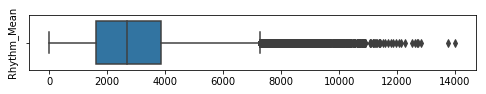

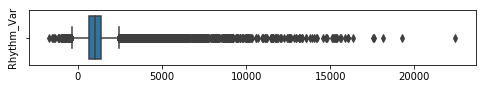

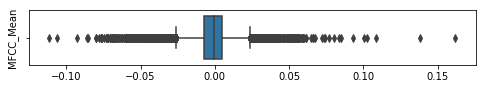

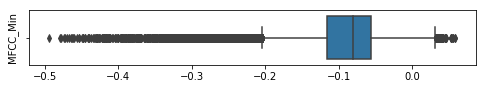

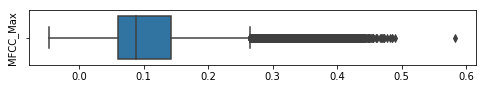

In [6]:
#Checking for outliers:

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,0:24])
plt.ylabel('Rhythm_Mean')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,48:72])
plt.ylabel('Rhythm_Var')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,220:228])
plt.ylabel('MFCC_Mean')
plt.show() 

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,240:252])
plt.ylabel('MFCC_Min')
plt.show()

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,252:264])
plt.ylabel('MFCC_Max')
plt.show()

From the above boxplots, it can be observed that there are certain outliers in the data. We will remove those outliers in order for the model to perform better. In addition, we could observe that the column 'MFCC_Mean_1', 'MFCC_Mean_2', 'MFCC_Mean_3', 'MFCC_Mean_4','MFCC_Min_1' seems to have a null or error data. We will drop those columns. 

In [7]:
#Remove outliers 
X = pd.concat([X, y], axis=1)
X = X[X.Rhythm_Mean_15 <= 12000]
X = X[X.Rhythm_Mean_16 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.MFCC_Max_2 < 0.5]
X = X[(X.MFCC_Mean_5 > -0.8) & (X.MFCC_Mean_5 < 0.8) ]
X = X[(X.MFCC_Mean_6 > -0.8) & (X.MFCC_Mean_6 < 0.8) ]
X = X[(X.MFCC_Mean_7 > -0.8) & (X.MFCC_Mean_7 < 0.8) ]
X = X[(X.MFCC_Mean_8 > -0.8) & (X.MFCC_Mean_8 < 0.8) ]
X = X[(X.MFCC_Mean_9 > -0.8) & (X.MFCC_Mean_9 < 0.8) ]
X = X[(X.MFCC_Mean_10 > -0.8) & (X.MFCC_Mean_10 < 0.8) ]
X = X[(X.MFCC_Mean_11 > -0.8) & (X.MFCC_Mean_11 < 0.8) ]
X = X[(X.MFCC_Mean_12 > -0.8) & (X.MFCC_Mean_12 < 0.8) ]

y = pd.DataFrame(X.Genre)
X = X.iloc[:,:264]

X = X.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
X_test = X_test.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
indx= X_test.index
#Sanity check how the dimensions has changed
print(X.info())
print(y.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4362
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 8.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4362
Data columns (total 1 columns):
Genre    4354 non-null category
dtypes: category(1)
memory usage: 38.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 12.9 MB
None


## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*

Our method to find the best model follows the following process:

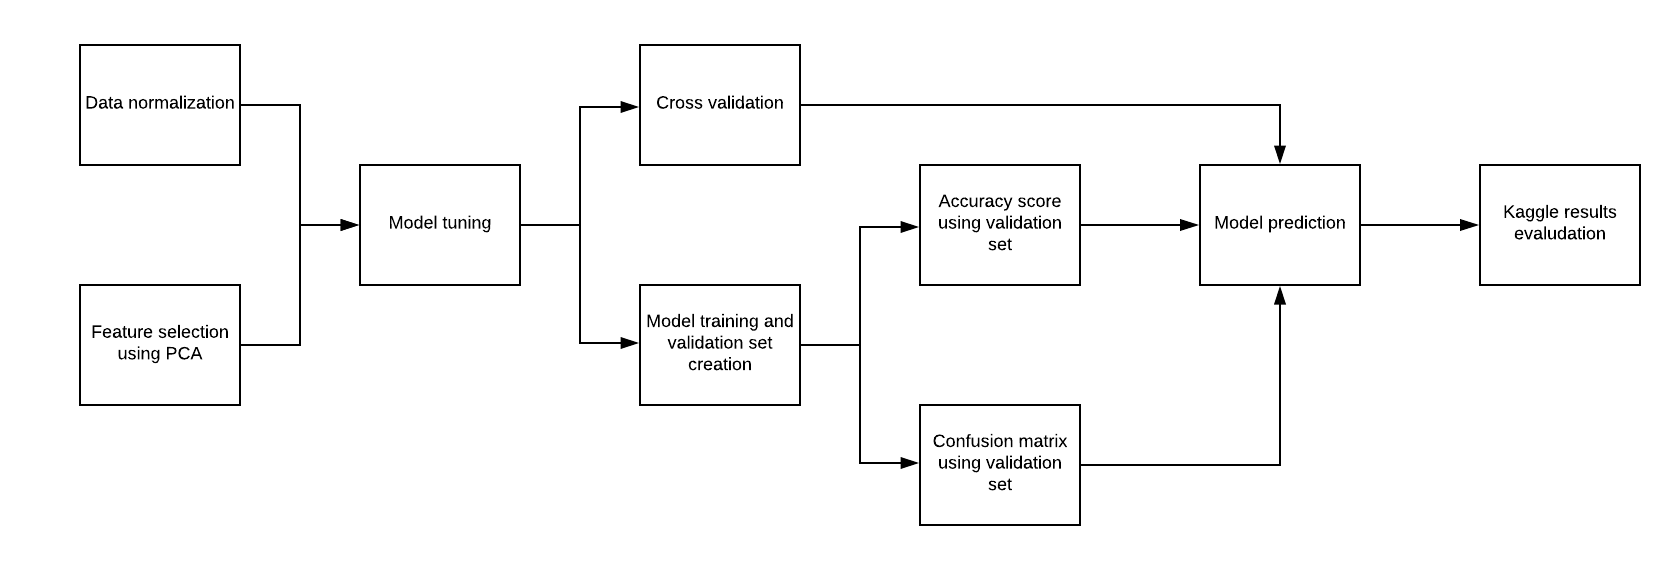

In [8]:
Image(filename='block digram for methods.png')

After the initial analysis on the data, we apply normalization and principle component analysis to help the algorithm learn the features better for a more accurate model prediction:

In [9]:
###Normalize data
from sklearn.preprocessing import MinMaxScaler

X = pd.concat([X,X_test]) # Concatenate the training and test datasets into a single dataframe
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(X)
X = scaler.transform(X)

X_test_norm = X[4354:]
X_norm = X[:4354]


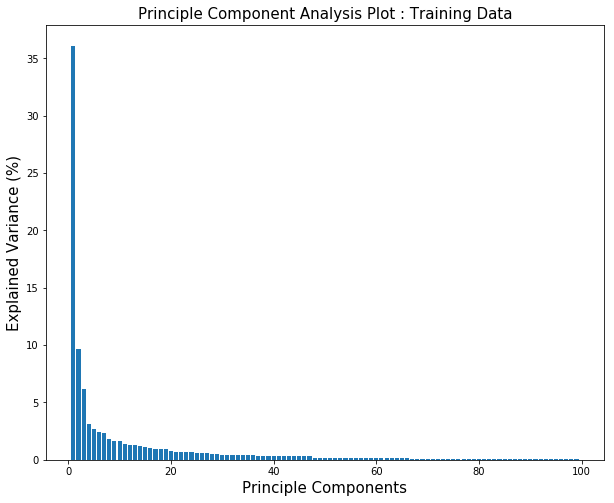

In [10]:
#Feature Selection 
from sklearn.decomposition import PCA
# Choose the number of principle components such that 97% of the variance is retained
pca = PCA(0.97)
X_PCA = pca.fit_transform(X)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# Principal Component Analysis of data
plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(varPCA)+1), height = varPCA)
plt.ylabel("Explained Variance (%)", size = 15)
plt.xlabel("Principle Components", size = 15)
plt.title("Principle Component Analysis Plot : Training Data", size = 15)
plt.show()

X_test_PCA = X_PCA[4354:]
X_PCA = X_PCA[:4354]



To evaluate the effect of PCA on our prediction, two versions of X are created for testing: one for only normalized data, and one for PCA-applied data. First, cross validation is used to evaluate the models:

In [11]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

    
def run_model_norm(model, alg_name):
    global X_norm
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
    results = cross_validate(model, X_norm, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results: Log loss: test ", results['test_neg_log_loss'],", train " ,results['train_neg_log_loss'], "; Accuracy: test ",results['test_accuracy'],", train ",results['train_accuracy'])
    
def run_model_PCA(model, alg_name):
    global X_PCA
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state = 36851234)
    results = cross_validate(model, X_PCA, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results: Log loss: test", results['test_neg_log_loss'],", train ",results['train_neg_log_loss'], "; Accuracy: test ",results['test_accuracy'],", train ",results['train_accuracy'] )

Two models are chosen in this project: Logistic Regression and Neural Networks. (needs to be checked again).

Logistic regression is an easy and widely used method for binary classification. Classifying a dataset into multiple categories is a problem which can be solved by applying binary classification multiple times and finding the best results to give the best class/ category. As it performs well enough in many situation, it is also usually used as a baseline method. Moreover, logistic regression is also sensitive to unbalanced categories, making it a good choice for our project (needs to be checked again).
(https://towardsdatascience.com/the-logistic-regression-algorithm-75fe48e21cfa; https://machinelearningmastery.com/logistic-regression-for-machine-learning/).

Neural Network is a deep learning method based the workings of the brain. It can identify and learn complex and nonlinear data relationship to create an applicable prediction or a classification model for modelling complex problems. Many real-life data relationships are nonlinear, making this method useful in many situations. 
(https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207) 

In [12]:
#Running models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

names = ["Neural Net","LogReg"]

classifiers = [
    MLPClassifier(),
    LogisticRegression()]

for name, clf in zip(names, classifiers):
    run_model_norm(clf, name)
    run_model_PCA(clf, name)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test  [-1.15418317 -1.10428579 -1.13949896 -1.15877266] , train  [-0.78122549 -0.80332975 -0.7994324  -0.76421206] ; Accuracy: test  [ 0.63744837  0.65333333  0.64525011  0.64229885] , train  [ 0.75770115  0.73657641  0.73931034  0.76135842]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test [-1.4696798  -1.3926185  -1.46704153 -1.48024041] , train  [-0.22631463 -0.25648985 -0.20608851 -0.23457392] ; Accuracy: test  [ 0.60853603  0.62758621  0.62459844  0.62252874] , train  [ 0.96137931  0.94951813  0.9691954   0.9596145 ]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: Log loss: test  [-1.16890816 -1.13492026 -1.15577796 -1.16918369] , train  [-0.98301916 -1.01445277 -1.00338942 -0.98488677] ; Accuracy: test  [ 0.63056448  0.64229885  0.63331804  0.62942529] , train  [ 0.69011494  0.6819642   0.68137931  0.68379991]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: Log loss: test [-1.17924673 -1.14452039 -1.1651112  -1.18121035] , train  [-1.01385931 -1.0503234  -1.03659115 -1.01690177] ; Accuracy: test  [ 0.62643414  0.63724138  0.63010555  0.6262069 ] , train  [ 0.67954023  0.66727857  0.67310345  0.67691602]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


From the results, even with the default settings, both models perform quite well above the baseline (0.5 accuracy) ...

In [13]:
#Model tuning by changing the default parameters

NeuralNet =  MLPClassifier(alpha=0.3, learning_rate = 'adaptive')
LogReg = LogisticRegression(penalty= 'l1',solver= 'saga',max_iter =500, multi_class='multinomial')

#Running tuned models against cross validation
tuned_classifiers = [
    NeuralNet,
    LogReg]

for name, clf in zip(names, tuned_classifiers):
    run_model_norm(clf, name)
    run_model_PCA(clf, name)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_tr

Neural Net , Results: Log loss: test  [-1.13094235 -1.10594358 -1.11340439 -1.1462128 ] , train  [-0.89311303 -0.9770723  -0.90475689 -0.92072901] ; Accuracy: test  [ 0.64020193  0.64781609  0.64938045  0.6445977 ] , train  [ 0.70896552  0.69481413  0.70804598  0.70445158]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: Log loss: test [-1.13428042 -1.10491855 -1.11948256 -1.14581829] , train  [-0.65915625 -0.69020133 -0.67728758 -0.65232691] ; Accuracy: test  [ 0.63744837  0.64873563  0.65259293  0.64137931] , train  [ 0.79816092  0.79577788  0.78666667  0.79899036]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be ava

LogReg , Results: Log loss: test  [-1.13521038 -1.11388388 -1.12279866 -1.15189443] , train  [-0.9599429  -0.99367258 -0.98757094 -0.95698023] ; Accuracy: test  [ 0.63423589  0.64137931  0.64387334  0.63770115] , train  [ 0.69103448  0.68793024  0.68091954  0.69022487]
LogReg , Results: Log loss: test [-1.16492627 -1.1350176  -1.15387215 -1.17578338] , train  [-0.97764686 -1.01851769 -1.00728717 -0.97839538] ; Accuracy: test  [ 0.62964663  0.64091954  0.63285911  0.63310345] , train  [ 0.69149425  0.66819642  0.67632184  0.68379991]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [22]:
#Running final models for predictions
from sklearn.model_selection import train_test_split


def predict_acc(model, alg_name, X_test):
    global indx 
    y_test = model.predict(X_test)
    result = pd.DataFrame(index= indx, columns = ["Sample_id","Sample_label"])
    result["Sample_id"] = range(1, 6545)
    result["Sample_label"] = y_test
    return result
def predict_log_loss(model, alg_name, X_test):
    global indx
    y_test_prob= model.predict_proba(X_test)
    result = pd.DataFrame(index = indx, columns = ["Sample_id","Class_1", "Class_2", "Class_3", "Class_4", "CLass_5", "Class_6", "Class_7", "Class_8", "Class_9","Class_10"])
    result["Sample_id"] = range(1, 6545)
    result.iloc[:, 1:] = y_test_prob
    return result



In [24]:
#Predict and get results for each model

X_model  = {'X_normalized':X_norm, 'X_PCA' :X_PCA}
X_test_pred = {'X_test_normalized' :X_test_norm, 'X_test_PCA' :X_test_PCA}
for name, clf in zip(names, tuned_classifiers):  
    y = np.ravel(y)
    for key, value in X_model.items():
        X_train, X_val, y_train, y_val = train_test_split(value, y, test_size=0.2, random_state=42)
        clf.fit(X_train, y_train)
        print("----",name, "----")
        print(key)
        print(clf.score(X_train,y_train))
        print(clf.score(X_val,y_val))
        if "normalize" in key :
            result_norm_acc = predict_acc(clf, name, X_test_pred.get('X_test_normalized'))
            result_norm_acc.to_csv(str(name + '_X_test_normalized_Accuracy.csv'), index = False)
            result_norm_logloss = predict_log_loss(clf, name, X_test_pred.get('X_test_normalized'))
            result_norm_logloss.to_csv(str(name + '_X_test_normalized_Logloss.csv') , index = False)
            print('Normalized')
        elif 'PCA' in key :
            result_pca_acc=predict_acc(clf, name, X_test_pred.get('X_test_PCA'))
            result_pca_acc.to_csv(str(name + '_X_test_PCA_Accuracy.csv'), index = False)
            result_pca_logloss =predict_log_loss(clf, name, X_test_pred.get('X_test_PCA'))
            result_pca_logloss.to_csv(str(name + '_X_test_PCA_Logloss.csv') , index = False)
            print('PCA')
        else:
            print('None')
    

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


---- Neural Net ----
X_normalized
0.688774045363
0.678530424799
normalize


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


---- Neural Net ----
X_PCA
0.75222509331
0.675086107922
PCA


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


---- LogReg ----
X_normalized
0.683318977893
0.670493685419
normalize
---- LogReg ----
X_PCA
0.680734998564
0.675086107922
PCA


## 4. Results

Result:
Logistic Regression model:
- Accuracy
- LogLoss
MLPClassifier model:
- Accuracy
- LogLoss

Kaggle public board result:
- The MLPClassifier performs better on the Accuracy test with approx. 64% accuracy. Logistic Regression also generates good result, although slightly worse than the MLPClassifier. 
- On the LogLoss test, Logistic Regression outperform MLPClassifier with result of around 0.18 while MLPClassifier ended up with around 0.3. 

Confusion matrix:

In [16]:
#To plot X val and y val instead of X and y 

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)
tn, fp, fn, tp = confusion_matrix(y_true=y_Pop), y_pred=y_pred.ravel()
print(tn, fp, fn, tp)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

SyntaxError: can't assign to function call (<ipython-input-16-d99ab763dca5>, line 6)

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *

Logistic Regression performs better in Log Loss test than accuracy. Significantly better in Log Loss test. Reason unknown 
For imbalanced multiclass, models tend to overfit available data. 

Relevance of the performance metric 

Comparing with other music genre classification discussion:
- SVM is used in a paper and can generate good result but not fit in this dataset
- A feature is proposed that are useful for classification but not in here
- Some other test shows that the accuracy varies between 55-70% so this is a good outcome. 

What can be improved on:
- Adding additional data for minor classes, some dataset already avaibale ...
- Semi-supervise Learning 
- Adding features 
- Ensemble models 

What questions are mentioned on the introductory?

## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *